In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import pathlib

from scripts.common.schemas import TypeCollectionCategory
from scripts.infer.structure import DatasetFolderStructure

dataset = DatasetFolderStructure(pathlib.Path(
    "/home/container/mdti4py/better-types-4-py-dataset/"
))
assert dataset.dataset_root.is_dir(), f"{dataset.dataset_root} not a directory!"

print(dataset)

BetterTypes4Py @ /home/container/mdti4py/better-types-4-py-dataset


In [88]:
import importlib

import experiments.inferred

In [89]:
artifact_root = pathlib.Path("/home/container/mdti4py/")

# Ground Truth

In [90]:
importlib.reload(experiments.inferred)
groundtruth = experiments.inferred.load_groundtruths(artifact_root, dataset)

/home/container/mdti4py/BetterTypes4Py/marcosschroh__dataclasses-avroschema/extended_ground_truth.csv: 100%|█| 50/50 [


In [91]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"].drop(columns=["category", "qname", "repository"])

,file,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno
320,aiosonic/pools.py,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN
321,aiosonic/pools.py,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN
322,aiosonic/pools.py,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN
323,aiosonic/pools.py,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN
324,aiosonic/pools.py,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN
325,aiosonic/pools.py,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN
326,aiosonic/pools.py,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN
327,aiosonic/pools.py,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult
328,aiosonic/pools.py,CyclicQueuePool.release,NaN,NaN,NaN,NaN
329,aiosonic/pools.py,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN


In [92]:
trivial_mask = groundtruth["adjusted_anno"].isin(["None", "Any"])
groundtruth = groundtruth[~trivial_mask]

groundtruth

,file,category,qname,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno,repository
0,aiosonic/__init__.py,CALLABLE_RETURN,HttpHeaders._clear_line,HttpHeaders._clear_line,NaN,NaN,NaN,NaN,sonic182__aiosonic
1,aiosonic/__init__.py,CALLABLE_PARAMETER,HttpHeaders._clear_line.line,HttpHeaders._clear_line.line,builtins.bytes,builtins.bytes,bytes,bytes,sonic182__aiosonic
2,aiosonic/__init__.py,CALLABLE_RETURN,HttpResponse.__init__,HttpResponse.__init__,NaN,NaN,NaN,NaN,sonic182__aiosonic
3,aiosonic/__init__.py,CALLABLE_PARAMETER,HttpResponse.__init__.self,HttpResponse.__init__.self,NaN,NaN,NaN,NaN,sonic182__aiosonic
4,aiosonic/__init__.py,CALLABLE_RETURN,HttpResponse._set_response_initial,HttpResponse._set_response_initial,NaN,NaN,NaN,NaN,sonic182__aiosonic
...,...,...,...,...,...,...,...,...,...
2905,tests/schemas/test_nested_schemas.py,VARIABLE,test_alias_nested_item_with_map.Address.street...,test_alias_nested_item_with_map.Address.street...,builtins.int,builtins.int,int,int,marcosschroh__dataclasses-avroschema
2906,tests/schemas/test_nested_schemas.py,VARIABLE,test_alias_nested_item_with_map.User.name,test_alias_nested_item_with_map.User.nameλ1,builtins.str,builtins.str,str,str,marcosschroh__dataclasses-avroschema
2907,tests/schemas/test_nested_schemas.py,VARIABLE,test_alias_nested_item_with_map.User.age,test_alias_nested_item_with_map.User.ageλ1,builtins.int,builtins.int,int,int,marcosschroh__dataclasses-avroschema
2908,tests/schemas/test_nested_schemas.py,VARIABLE,test_alias_nested_item_with_map.User.address,test_alias_nested_item_with_map.User.addressλ1,"typing.Dict[builtins.str, tests.schemas.test_n...","typing.Dict[builtins.str, tests.schemas.test_n...","Dict[str, Address]",Dict,marcosschroh__dataclasses-avroschema


In [93]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"].drop(columns=["category", "qname", "repository"])

,file,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno
320,aiosonic/pools.py,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN
321,aiosonic/pools.py,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN
322,aiosonic/pools.py,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN
323,aiosonic/pools.py,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN
324,aiosonic/pools.py,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN
325,aiosonic/pools.py,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN
326,aiosonic/pools.py,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN
327,aiosonic/pools.py,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult
328,aiosonic/pools.py,CyclicQueuePool.release,NaN,NaN,NaN,NaN
329,aiosonic/pools.py,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN


In [94]:
groundtruth.raw_anno.value_counts()

builtins.str                                                                                            3142
builtins.int                                                                                            1158
builtins.bool                                                                                            811
tests.basilisp.helpers.CompileFn                                                                         415
typing.Optional[builtins.str]                                                                            279
                                                                                                        ... 
cachetools.LRUCache[builtins.str, builtins.int]                                                            1
cachetools.LRUCache[typing.Tuple[builtins.str, builtins.str], markupsafe.Markup]                           1
typing.Dict[builtins.str, typing.Union[builtins.int, builtins.str]]                                        1
typing.Optional[typ

In [95]:
groundtruth.adjusted_anno.value_counts()

str                                      3516
int                                      1303
bool                                      941
CompileFn                                 415
Dict                                      238
                                         ... 
List[MeshfileLod]                           1
Tuple[float, ...]                           1
Union[DataSource, UnusableDataSource]       1
AccessAnswer                                1
List[NodeId]                                1
Name: adjusted_anno, Length: 1831, dtype: int64

In [96]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"]

,file,category,qname,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno,repository
320,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.__init__,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN,sonic182__aiosonic
321,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.self,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN,sonic182__aiosonic
322,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.connector,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN,sonic182__aiosonic
323,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.pool_size,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN,sonic182__aiosonic
324,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.connection_cls,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN,sonic182__aiosonic
325,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.acquire,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN,sonic182__aiosonic
326,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.acquire.self,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN,sonic182__aiosonic
327,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.acquire._urlparsed,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult,sonic182__aiosonic
328,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.release,CyclicQueuePool.release,NaN,NaN,NaN,NaN,sonic182__aiosonic
329,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.release.self,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN,sonic182__aiosonic


In [140]:
from scripts.common.schemas import ExtendedTypeCollectionSchema

import experiments.inferred
from experiments.predictions import ubiquitous, co_occurrences

import pandera.typing as pt, pandas as pd, seaborn as sns
import importlib

import matplotlib.pyplot as plt

def pipeline(tool: str, groundtruth: pt.DataFrame[ExtendedTypeCollectionSchema], threshold: float) -> pd.DataFrame:
    importlib.reload(experiments.inferred)
    print(f"Loaded inferred")
    
    inferred = experiments.inferred.load_entire_inferred(artifact_root, dataset, tool_name=tool, task="all")
    experiments.inferred.error_if_duplicate_keys(inferred)
    print(f"No duplicate keys found")

    adjusted = experiments.inferred.typet5_base_form(inferred)
    trivial_mask = adjusted["anno"].isin(["None", "Any"])
    adjusted = adjusted[~trivial_mask]
    print(f"Converted to base form")

    aligned = experiments.inferred.join_truth_to_preds(
        truth=groundtruth, 
        predictions=adjusted, 
        comparable_anno=ExtendedTypeCollectionSchema.base_anno,
    )
    print(f"Joined ground truth to predictions")
    
    evaluatable = experiments.inferred.evaluatable(aligned)
    assert evaluatable["gt_anno"].notna().all()
    assert evaluatable["anno"].notna().all()
    print(f"Reduced to evaluatable")

    evaluatable_ubiq = ubiquitous(evaluatable)
    return evaluatable_ubiq


In [168]:
%matplotlib agg
thres_figs, (ax1, ax2, ax3) = plt.subplots(3, 1)

# Type4Py

In [169]:
type4py_ubiq = pipeline(tool="type4pyN1", groundtruth=groundtruth, threshold=0.06)
#co_occurrences(evaluatable_ubiq, truth="gt_anno", pred="anno", threshold=0.0, figsize=(30, 15), ax=ax)
ax1.set_title('Type4Py')
co_occurrences(type4py_ubiq, truth="gt_anno", pred="anno", threshold=0.06, figsize=(10, 5), ax=ax1)

Loaded inferred


/home/container/mdti4py/BetterTypes4Py/marcosschroh__dataclasses-avroschema/type4pyN1/all/inferred.csv: 100%|█| 50/50 


No duplicate keys found


100%|████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 59650.11it/s]


Converted to base form
Index(['file', 'category', 'qname', 'qname_ssa', 'anno', 'method', 'topn',
       'repository'],
      dtype='object')
Index(['file', 'category', 'qname', 'qname_ssa', 'gt_anno', 'repository'], dtype='object')
Joined ground truth to predictions
Reduced to evaluatable
6867 / 15747 ground truth labels are ubiquitous


/home/container/mdti4py/scripts/experiments/inferred.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["anno"].fillna("<MISSING>", inplace=True)


# Typilus

In [368]:
typilus_ubiq = pipeline(tool="typilusN1", groundtruth=groundtruth, threshold=0.06)
#co_occurrences(evaluatable_ubiq, truth="gt_anno", pred="anno", threshold=0.0, figsize=(30, 15), ax=ax)
ax2.set_title('Typilus')
co_occurrences(typilus_ubiq, truth="gt_anno", pred="anno", threshold=0.06, figsize=(10, 5), ax=ax2)

Loaded inferred


/home/container/mdti4py/BetterTypes4Py/marcosschroh__dataclasses-avroschema/typilusN1/all/inferred.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 77.42it/s]


No duplicate keys found


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:01<00:00, 48741.02it/s]


Converted to base form
Index(['file', 'category', 'qname', 'qname_ssa', 'anno', 'method', 'topn',
       'repository'],
      dtype='object')
Index(['file', 'category', 'qname', 'qname_ssa', 'gt_anno', 'repository'], dtype='object')
Joined ground truth to predictions
Reduced to evaluatable
6849 / 15726 ground truth labels are ubiquitous


/home/container/mdti4py/scripts/experiments/inferred.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["anno"] = cleaned["anno"].fillna("<MISSING>")


<Figure size 1000x500 with 0 Axes>

# TypeT5

In [171]:
from scripts.common.schemas import TypeCollectionCategory
typet5_groundtruth = groundtruth[groundtruth[ExtendedTypeCollectionSchema.category].isin(
    [TypeCollectionCategory.CALLABLE_RETURN, TypeCollectionCategory.CALLABLE_PARAMETER]
)]

typet5_ubiq = pipeline(tool="TypeT5TopN1", groundtruth=typet5_groundtruth, threshold=0.06)
ax3.set_title('TypeT5')
co_occurrences(typet5_ubiq, truth="gt_anno", pred="anno", threshold=0.06, figsize=(10, 5), ax=ax3)

Loaded inferred


/home/container/mdti4py/BetterTypes4Py/marcosschroh__dataclasses-avroschema/TypeT5TopN1/all/inferred.csv: 100%|█| 50/5


No duplicate keys found


100%|████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 92242.94it/s]
/home/container/mdti4py/scripts/experiments/inferred.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["anno"].fillna("<MISSING>", inplace=True)


Converted to base form
Index(['file', 'category', 'qname', 'qname_ssa', 'anno', 'method', 'topn',
       'repository'],
      dtype='object')
Index(['file', 'category', 'qname', 'qname_ssa', 'gt_anno', 'repository'], dtype='object')
Joined ground truth to predictions
Reduced to evaluatable
5029 / 11999 ground truth labels are ubiquitous


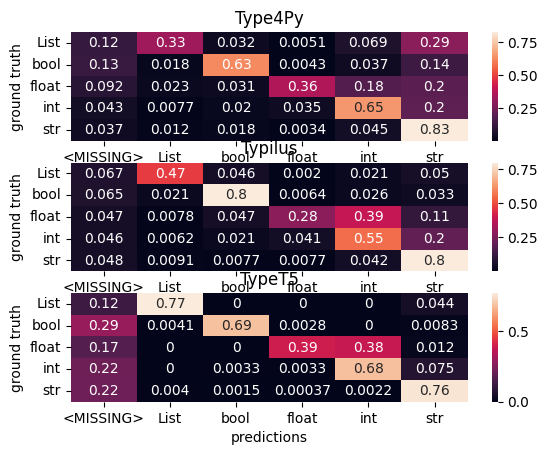

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [172]:
%matplotlib inline
plt.tight_layout()
plt.show()

# Overlap: Capture per symbol diversity

In [173]:
!pip install matplotlib-venn
from matplotlib_venn import venn3


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [375]:
ignore = ["gt_anno", "topn", "method"]

common_predictions = type4py_ubiq.drop(columns=ignore).merge(
    typilus_ubiq.drop(columns=ignore), 
    how="outer", 
    on=["repository", "category", "file", "qname", "qname_ssa"], 
    suffixes=("_type4py", "_typilus")
).merge(
    typet5_ubiq.drop(columns=ignore).rename(columns={"anno": "anno_typet5"}),
    how="outer", 
    on=["repository", "category", "file", "qname", "qname_ssa"]
)

common_predictions = pd.merge(
    left=common_predictions,
    right=groundtruth,
    how="left",
    on=["repository", "category", "file", "qname", "qname_ssa"],
).replace("<MISSING>", pd.NA).dropna(subset=["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"], how="all", axis=0)
    

common_predictions[["anno_type4py", "anno_typilus", "anno_typet5"]] = common_predictions[["anno_type4py", "anno_typilus", "anno_typet5"]]#.fillna("<MISSING>")
common_predictions[["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

,base_anno,anno_type4py,anno_typilus,anno_typet5
0,str,str,str,str
1,str,str,float,str
2,int,int,int,int
3,str,bytes,str,str
4,str,str,<NA>,str
...,...,...,...,...
6864,int,str,str,NaN
6865,str,str,str,NaN
6866,int,int,int,NaN
6867,int,NaN,int,Union


In [364]:
!pip install upsetplot
import upsetplot


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [377]:
for relevant in ["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"]:
    common_predictions[relevant] += common_predictions.index.astype("string")

common_predictions[["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

,base_anno,anno_type4py,anno_typilus,anno_typet5
0,str0,str0,str0,str0
1,str1,str1,float1,str1
2,int2,int2,int2,int2
3,str3,bytes3,str3,str3
4,str4,str4,<NA>,str4
...,...,...,...,...
6864,int6864,str6864,str6864,<NA>
6865,str6865,str6865,str6865,<NA>
6866,int6866,int6866,int6866,<NA>
6867,int6867,<NA>,int6867,Union6867


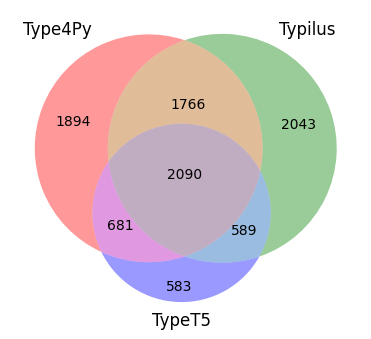

In [378]:
venn3(
    (set(common_predictions["anno_type4py"].tolist()), set(common_predictions["anno_typilus"].tolist()), set(common_predictions["anno_typet5"].tolist())),
    set_labels=('Type4Py', 'Typilus', 'TypeT5'),
)

/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


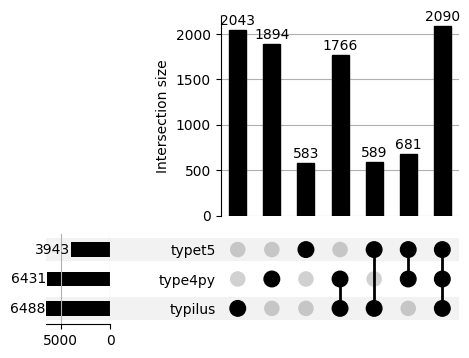

In [380]:
relevant = common_predictions[["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

gt_anno, type4py, typilus, typet5 = relevant.T.to_dict("records")

contents = {
    #"ground_truth": set(gt_anno.values()),
    "type4py": set(type4py.values()), 
    "typilus": set(typilus.values()), 
    "typet5": set(typet5.values())
}

import upsetplot
predictions_by_model = upsetplot.from_contents(contents)
predictions_by_model

upsetplot.UpSet(predictions_by_model, show_counts=True, subset_size='count')

/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


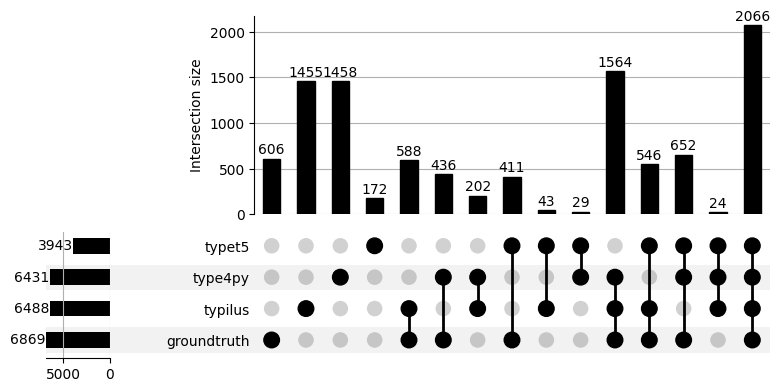

In [382]:
relevant = common_predictions[["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

gt_anno, type4py, typilus, typet5 = relevant.T.to_dict("records")

contents = {
    "groundtruth": set(gt_anno.values()),
    "type4py": set(type4py.values()), 
    "typilus": set(typilus.values()), 
    "typet5": set(typet5.values())
}

import upsetplot
predictions_by_model = upsetplot.from_contents(contents)
predictions_by_model

upsetplot.UpSet(predictions_by_model, show_counts=True, subset_size='count')